In [64]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df = pd.read_csv(r"D:\Rental Bike Project\Dataset.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
#Describe the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [4]:
print("Column names & dtypes:\n",df.dtypes)

Column names & dtypes:
 instant        int64
dteday        object
season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object


Rename the columns for better understanding of variables

In [5]:
display(df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [6]:
display(df.tail())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31-12-2012,springer,2012,12,23,No,1,?,Clear,0.26,0.2727,0.65,0.1343,12,37,49


In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


None

In [8]:
missing = df.isna().sum()
display ("Missing per values in column:",missing[missing>0])

'Missing per values in column:'

Series([], dtype: int64)

In [9]:
display("unique season :", df["season"].unique())

'unique season :'

array(['springer', '?', 'summer', 'fall', 'winter'], dtype=object)

In [10]:
display("Unique year :",df["yr"].unique())

'Unique year :'

array(['2011', '?', '2012'], dtype=object)

In [11]:
display("Unique working days :",df["workingday"].unique())

'Unique working days :'

array(['No work', 'Working Day', '?'], dtype=object)

In [12]:
display("Unique weathersit :",df["weathersit"].unique())

'Unique weathersit :'

array(['Clear', 'Mist', '?', 'Light Snow', 'Heavy Rain'], dtype=object)

In [13]:
print("missing-value % per column :",(df.isna().sum()/len(df)*100).round(2))

missing-value % per column : instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [14]:
dup_mask = df.duplicated(subset=None, keep='first')
print (f"Duplicated rows: {dup_mask.sum()} ({dup_mask.mean() *100:.2f} %)")
if dup_mask.sum():
    df = df[~dup_mask].reset_index(drop=True)
    print("Duplicates removed.")

Duplicated rows: 0 (0.00 %)


In [15]:
for col in df.columns:
    if df[col].dtype in ["object", "int64"]:
        unique = df[col].unique()
        if "?" in unique:
            print(f"{col}")
            df[col]=df[col].replace('?',np.nan)

season
yr
mnth
holiday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered


In [16]:
df["dteday"] = pd.to_datetime(df["dteday"], format='%d-%m-%Y')

In [17]:
numeric_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [18]:
display("numberical Describe",df.describe(include = [np.number]).T)

'numberical Describe'

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
temp,17368.0,0.497132,0.192525,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17373.0,0.475851,0.171829,0.00,0.3333,0.4848,0.6212,1.0000
hum,17373.0,0.627208,0.192939,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17374.0,0.190080,0.122321,0.00,0.1045,0.1940,0.2537,0.8507
casual,17378.0,35.676603,49.306423,0.00,4.0000,17.0000,48.0000,367.0000
registered,17378.0,153.792554,151.359786,0.00,34.0000,115.0000,220.0000,886.0000
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000


In [19]:
display("Categoric Describe",df.describe(include = [object]))

'Categoric Describe'

,season,yr,mnth,holiday,workingday,weathersit
count,17373,17378,17378,17378,17374,17375
unique,4,2,12,2,2,4
top,fall,2012,5,No,Working Day,Clear
freq,4496,8734,1488,16878,11862,11412


In [20]:
print("\nMissing % after coercion:\n", (df.isna().sum()/len(df)*100).round(2))


Missing % after coercion:
 instant       0.00
dteday        0.00
season        0.03
yr            0.01
mnth          0.01
hr            0.00
holiday       0.01
weekday       0.00
workingday    0.03
weathersit    0.02
temp          0.06
atemp         0.03
hum           0.03
windspeed     0.03
casual        0.01
registered    0.01
cnt           0.00
dtype: float64


In [21]:
from sklearn.impute import KNNImputer

def fill_all(df_):
    weather = ['temp','atemp','hum','windspeed']
    knn = KNNImputer(n_neighbors=5)
    df[weather] = knn.fit_transform(df[weather])
    
    cats = ['season','holiday','workingday','weathersit','yr','mnth']
    for col in cats:
        mode_val = df[col].mode()[0]      
        df[col] = df[col].fillna(mode_val)
    
    num = ['cnt']
    for col in num:
        med = df[col].median()
        df[col] = df[col].fillna(med)
    
    return df
    
df = fill_all(df)

In [22]:
def impute_casual_registered(df_):
    df_['casual'] = df_.groupby(['hr','weathersit'])['casual'].transform(
        lambda x: x.fillna(x.median()))
    df_['registered'] = df_.groupby(['hr','weathersit'])['registered'].transform(
        lambda x: x.fillna(x.median()))
    return df_
df = impute_casual_registered(df)
df['cnt'] = df['casual'] + df['registered']

In [23]:
if df[numeric_cols].isna().sum().sum() == 0:
    print("All missing values resolved.")
else:
    print("Warning: Missing values still present!")

All missing values resolved.


In [24]:
df.shape

(17379, 17)

Text(0.5, 1.0, 'Outliers')

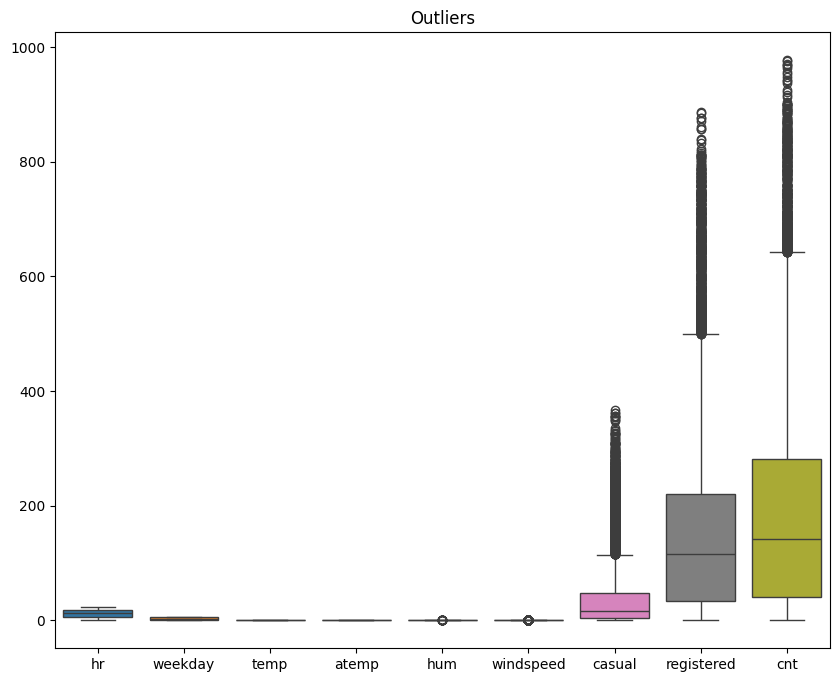

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df.drop("instant", axis=1))
plt.title("Outliers")

the box plot, we can observed that outliers are present in,humidity,windspeed,casual,registered,count variable.

In [26]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1                

    lower_bound = Q1 - 1.5 * IQR   
    upper_bound = Q3 + 1.5 * IQR  

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]  
    print(f"Outliers detected in {col}: {outliers.shape[0]}")

Outliers detected in instant: 0
Outliers detected in hr: 0
Outliers detected in weekday: 0
Outliers detected in temp: 0
Outliers detected in atemp: 0
Outliers detected in hum: 22
Outliers detected in windspeed: 341
Outliers detected in casual: 1192
Outliers detected in registered: 680
Outliers detected in cnt: 505


In [27]:
df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [28]:
df.shape

(16874, 17)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  object        
 3   yr          16874 non-null  object        
 4   mnth        16874 non-null  object        
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  object        
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  object        
 9   weathersit  16874 non-null  object        
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  hum         16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  float64       
 15  registered  16874 non-null  float64       
 16  cnt         16874 non-null 

In [30]:
df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24)
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

Text(0.5, 1.0, 'Hourly demand by weather situation')

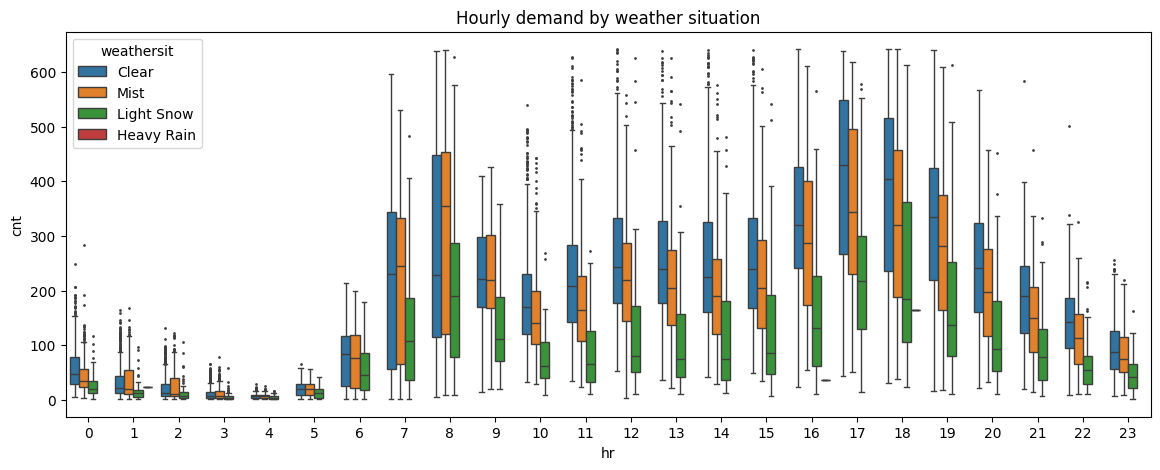

In [31]:
plt.figure(figsize=(14,5))
sns.boxplot(x='hr', y='cnt', hue='weathersit', data=df, fliersize=1)
plt.title("Hourly demand by weather situation")

Text(0.5, 1.0, 'Bike Rentals by Season')

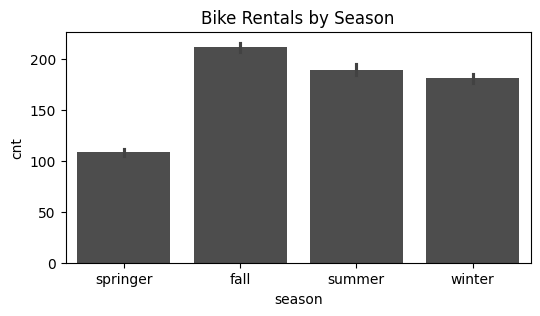

In [32]:
plt.figure(figsize=(6,3))
sns.barplot(x='season', y='cnt', data=df,color = "0.3",)
plt.title("Bike Rentals by Season")

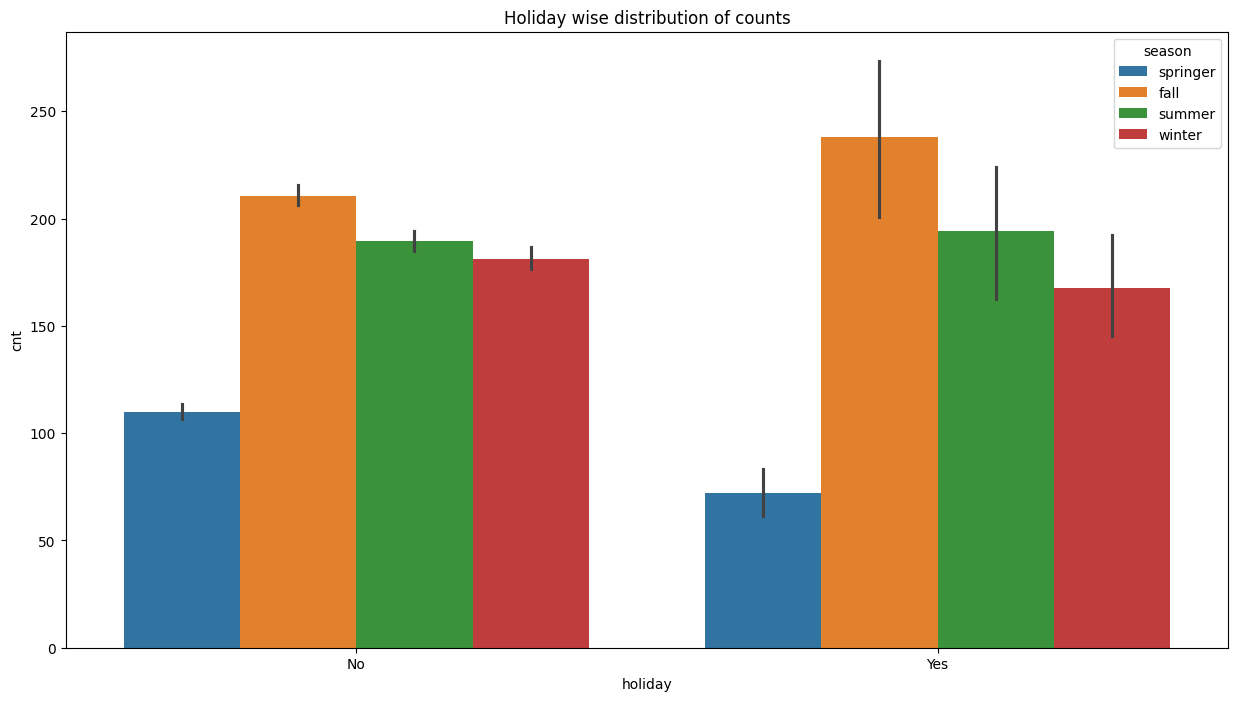

In [33]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='holiday',y='cnt',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.

Text(0.5, 1.0, 'Spearman correlation – numeric features')

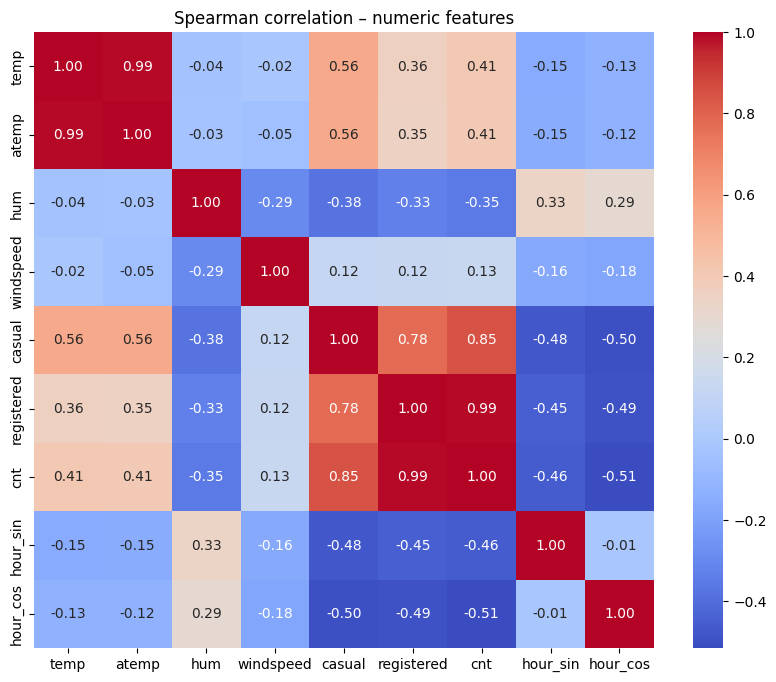

In [34]:
plt.figure(figsize=(10,8))
corr = df[numeric_cols + ['hour_sin','hour_cos']].corr(method='spearman')
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Spearman correlation – numeric features")

From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis

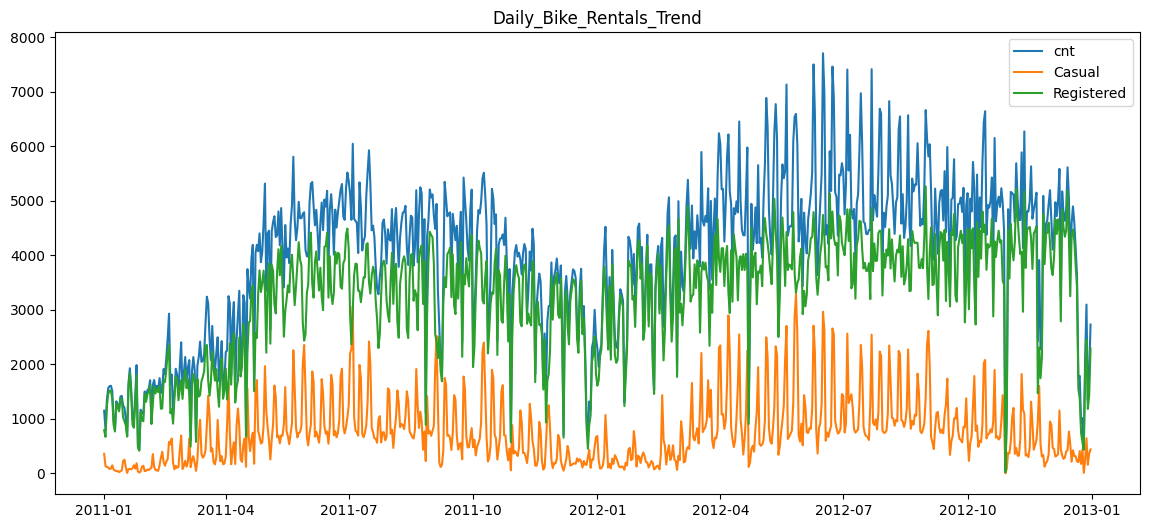

In [35]:
daily = df.groupby('dteday')[['cnt','casual','registered']].sum().reset_index()
plt.figure(figsize=(14,6))
plt.plot(daily['dteday'], daily['cnt'], label='cnt')
plt.plot(daily['dteday'], daily['casual'], label='Casual')
plt.plot(daily['dteday'], daily['registered'], label='Registered')
plt.title("Daily_Bike_Rentals_Trend")
plt.legend()

Blue line (count): Overall demand for bike rentals each day,
Orange line (Casual): Rentals by non-registered users, often tourists or occasional riders,
Green line (Registered): Rentals by registered users, typically commuters or regular subscribers,
Seasonal pattern is visible: rentals peak in warmer months and dip in winter,
Registered users show consistent usage, while casual users spike on weekends/holidays,
Overall upward trend suggests growing popularity of bike rentals over time.

In [36]:
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year
df['mnth'] = pd.to_numeric(df['mnth'], errors='coerce')
df["month_sin"] = np.sin(2*np.pi*df["mnth"]/12)
df["month_cos"] = np.cos(2*np.pi*df["mnth"]/12)

In [37]:
df["is_weekend"] = df["weekday"].apply(lambda x: 1 if x in [0,6] else 0)
df["comfort_index"] = (df["temp"] * (1 - df["hum"])) - df["windspeed"]

In [38]:
df['hour_type'] = df['hr'].apply(
    lambda x: 'Morning' if 6 <= x < 12 else
              'Afternoon' if 12 <= x < 18 else
              'Evening' if 18 <= x < 22 else 'Night'
)

In [39]:
# Despite correlation, the gap adds unique, actionable information
if "temp" in df.columns and "atemp" in df.columns: 
    df["temp_feel_gap"] = df["atemp"] - df["temp"] 

In [40]:
if all(c in df.columns for c in ["windspeed", "temp"]):
    df["wind_temp_ratio"] = df["windspeed"] / (df["temp"] + 1e-6)

In [41]:
df.set_index('dteday', inplace=True)
df.head(1)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,weekday_cos,month,year,month_sin,month_cos,is_weekend,comfort_index,hour_type,temp_feel_gap,wind_temp_ratio
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,1,0,No,6,No work,Clear,0.24,...,0.62349,1,2011,0.5,0.866025,1,0.0456,Night,0.0479,0.0


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [43]:
for col in ['season', 'weathersit', 'holiday', 'workingday', 'hour_type']:
    df[col] = le.fit_transform(df[col])

In [44]:
df.drop(["instant","atemp", "temp", "registered", "casual","hr", "mnth", "weekday"], axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16874 entries, 2011-01-01 to 2012-12-31
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           16874 non-null  int32  
 1   yr               16874 non-null  object 
 2   holiday          16874 non-null  int32  
 3   workingday       16874 non-null  int32  
 4   weathersit       16874 non-null  int32  
 5   hum              16874 non-null  float64
 6   windspeed        16874 non-null  float64
 7   cnt              16874 non-null  float64
 8   hour_sin         16874 non-null  float64
 9   hour_cos         16874 non-null  float64
 10  weekday_sin      16874 non-null  float64
 11  weekday_cos      16874 non-null  float64
 12  month            16874 non-null  int32  
 13  year             16874 non-null  int32  
 14  month_sin        16874 non-null  float64
 15  month_cos        16874 non-null  float64
 16  is_weekend       16874 non-null  int64  


In [46]:
FEATURES = [
    "season", "yr", "holiday", "workingday", "weathersit",
    "hum", "windspeed", "hour_sin", "hour_cos",
    "weekday_sin", "weekday_cos", "month_sin", "month_cos", "is_weekend",
    "comfort_index", "hour_type", "temp_feel_gap", "wind_temp_ratio"
]

In [47]:
TARGET_COL = ["cnt"]

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(df[FEATURES])
y = df[TARGET_COL].values.ravel()

In [50]:
print("feature columns",X)
print("target column",y)

feature columns [[-0.43267577 -0.97587467 -0.17438565 ...  1.11717418  1.98062621
  -0.84928045]
 [-0.43267577 -0.97587467 -0.17438565 ...  1.11717418  2.11925473
  -0.84928045]
 [-0.43267577 -0.97587467 -0.17438565 ...  1.11717418  2.11925473
  -0.84928045]
 ...
 [-0.43267577  1.02472175 -0.17438565 ... -0.58151445  0.52791483
   0.24975856]
 [-0.43267577  1.02472175 -0.17438565 ...  1.11717418  0.96401705
   0.04962905]
 [-0.43267577  1.02472175 -0.17438565 ...  1.11717418  0.96401705
   0.04962905]]
target column [16. 40. 32. ... 90. 61. 49.]


In [51]:
#Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

In [53]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, rmse, mae, r2])

results_df = pd.DataFrame(
    results, columns=['Model', 'RMSE', 'MAE', 'R2 Score']
)

results_df

,Model,RMSE,MAE,R2 Score
0,Linear Regression,106.259401,78.449021,0.515352
1,Decision Tree,67.359379,40.484741,0.805245
2,Random Forest,46.398771,29.337300,0.907593
3,Gradient Boosting,63.443802,45.416369,0.827229
4,Support Vector Regression,105.308342,68.183196,0.523988
5,KNN Regressor,79.602607,53.471704,0.728014


In [54]:
#Decision Tree Hyperparameter Grid

dt_params = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [2, 5, 10]
}

dt = DecisionTreeRegressor(random_state=42)

dt_grid = GridSearchCV(
    dt,
    dt_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

print("Best DT Params:", dt_grid.best_params_)


Best DT Params: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [55]:
#Random Forest Hyperparameter Grid

rf_params = {
    'n_estimators': [200, 300],
    'max_depth': [20, 30, 40],
    'min_samples_split': [None, 2, 5],
    'min_samples_leaf': [None, 1, 2]
}

rf = RandomForestRegressor(random_state=42)

rf_grid = GridSearchCV(
    rf,
    rf_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

print("Best RF Params:", rf_grid.best_params_)


Best RF Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [56]:
#Gradient Boosting Hyperparameter Grid

gb_params = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7, 10],
    'min_samples_split': [1, 2, 5 ],
    'min_samples_leaf': [2, 4, 6],
    'subsample': [0.5, 0.8, 1]
}

gb = GradientBoostingRegressor(random_state=42)

gb_grid = GridSearchCV(
    gb,
    gb_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

print("Best GB Params:", gb_grid.best_params_)


Best GB Params: {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.5}


In [57]:


models = {
    'Decision Tree (Tuned)': best_dt,
    'Random Forest (Tuned)': best_rf,
    'Gradient Boosting (Tuned)': best_gb
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, mse, rmse, r2])

results_df = pd.DataFrame(
    results,
    columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2']
)

results_df.sort_values(by='RMSE')


,Model,MAE,MSE,RMSE,R2
2,Gradient Boosting (Tuned),24.388164,1499.981188,38.729591,0.935616
1,Random Forest (Tuned),29.053152,2121.028045,46.054620,0.908959
0,Decision Tree (Tuned),38.488769,3883.935133,62.321225,0.833289


In [58]:
# After applying feature engineering, removing data leakage, and performing extensive hyperparameter tuning,
# the Gradient Boosting Regressor achieved the best performance with an R² score of 0.94 and the lowest RMSE. 
# This indicates a strong ability to capture complex relationships between weather, time, and demand. 
# Therefore, Gradient Boosting was selected as the final model for bike rental demand prediction

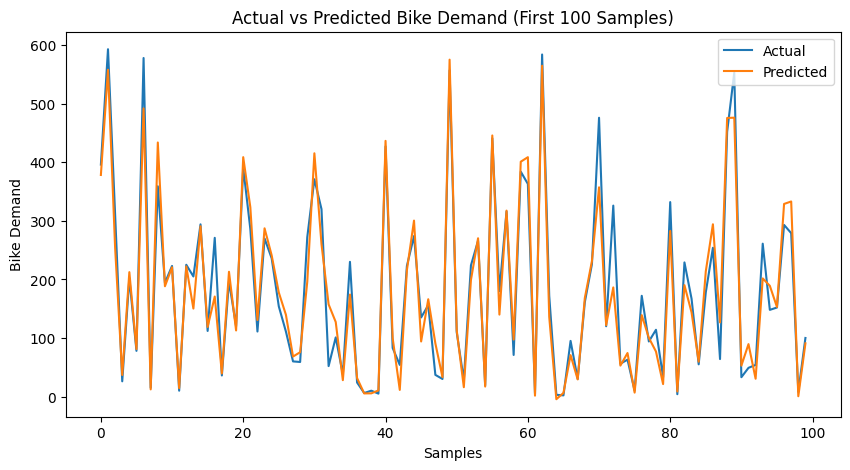

In [59]:
plt.figure(figsize=(10,5))

plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel("Samples")
plt.ylabel("Bike Demand")
plt.title("Actual vs Predicted Bike Demand (First 100 Samples)")
plt.legend()
plt.show()


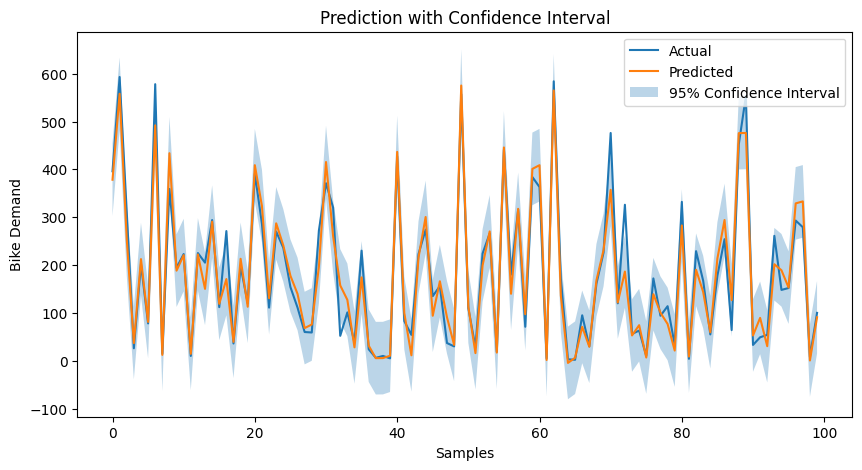

In [60]:
import numpy as np
import matplotlib.pyplot as plt

residuals = y_test - y_pred
std = np.std(residuals)

upper = y_pred + 1.96 * std
lower = y_pred - 1.96 * std

plt.figure(figsize=(10,5))

plt.plot(y_test[:100], label="Actual")
plt.plot(y_pred[:100], label="Predicted")

plt.fill_between(
    range(100),
    lower[:100],
    upper[:100],
    alpha=0.3,
    label="95% Confidence Interval"
)

plt.xlabel("Samples")
plt.ylabel("Bike Demand")
plt.title("Prediction with Confidence Interval")
plt.legend()
plt.show()


In [61]:
# Final Tuned Gradient Boosting Model
final_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.5,
    min_samples_split=2,
    min_samples_leaf=6,
    random_state=42
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print(rmse,mae,r2)

38.72959060277766 24.388164496748015 0.9356160298559114


In [65]:
# Save model & scaler
joblib.dump(final_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Final Gradient Boosting model saved as model.pkl")

Final Gradient Boosting model saved as model.pkl
